In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import numpy as np
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simpletransformers.classification import ClassificationModel

In [21]:
data=pd.read_csv("/content/drive/MyDrive/GameOfThrones/Game_of_Thrones_Script.csv")

In [22]:
data

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!


In [23]:
data.Name.value_counts().head(10)

tyrion lannister      1760
jon snow              1133
daenerys targaryen    1048
cersei lannister      1005
jaime lannister        945
sansa stark            784
arya stark             783
davos                  528
theon greyjoy          455
petyr baelish          449
Name: Name, dtype: int64

In [24]:
temp = data['Name'].value_counts().reset_index()
temp.columns=['Character', 'No of Dialouges']
px.bar(temp.head(10), 'Character', 'No of Dialouges', color='No of Dialouges', title='Characters with most dialouges in G.O.T.')

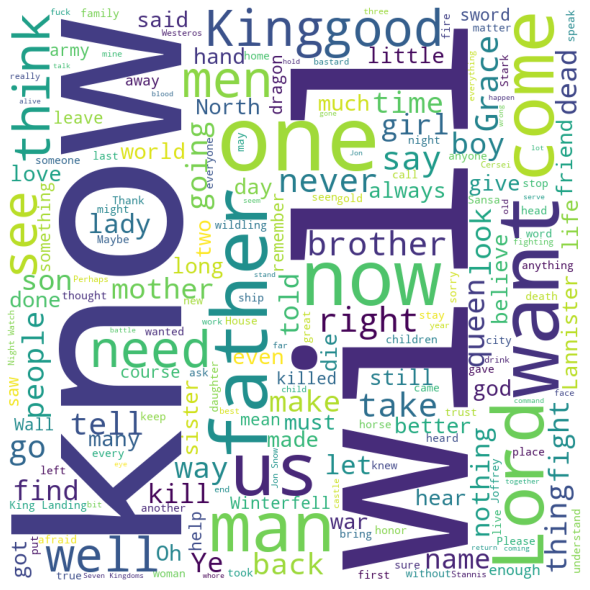

In [25]:
wordcloud = WordCloud(width = 800, height = 800,stopwords=STOPWORDS, min_font_size=10, background_color ='white').generate(
    ' '.join(i for i in data['Sentence']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
top_characters=["tyrion lannister", "jon snow", "daenerys targaryen", "cersei lannister", "jaime lannister", "sansa stark", "arya stark", "theon greyjoy", "petyr baelish", "bran stark"]

len(top_characters)

10

In [ ]:
df=data[data["Name"].isin(top_characters)]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df["Name"].unique()

array(['jon snow', 'sansa stark', 'bran stark', 'theon greyjoy',
       'jaime lannister', 'cersei lannister', 'arya stark',
       'tyrion lannister', 'daenerys targaryen', 'petyr baelish'],
      dtype=object)

In [ ]:
df["Name"].value_counts()

tyrion lannister      1760
jon snow              1133
daenerys targaryen    1048
cersei lannister      1005
jaime lannister        945
sansa stark            784
arya stark             783
theon greyjoy          455
petyr baelish          449
bran stark             399
Name: Name, dtype: int64

In [ ]:
df['labels'] = pd.factorize(df.Name)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


PRE PROCESSING

In [ ]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['clean_msg']= df['Sentence'].apply(lambda x:remove_punctuation(x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Release Date,Season,Episode,Episode Title,Name,Sentence,labels,clean_msg
0,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,0,Go on Fathers watching
1,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,0,And your mother
2,2011-04-17,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,1,Thank you
3,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,"Don't think too much, Bran.",0,Dont think too much Bran
4,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Don't look away.,0,Dont look away


In [ ]:
#lowering the text
df['msg_lower']= df['clean_msg'].apply(lambda x: x.lower())
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Release Date,Season,Episode,Episode Title,Name,Sentence,labels,clean_msg,msg_lower
0,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,0,Go on Fathers watching,go on fathers watching
1,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,0,And your mother,and your mother
2,2011-04-17,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,1,Thank you,thank you
3,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,"Don't think too much, Bran.",0,Dont think too much Bran,dont think too much bran
4,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Don't look away.,0,Dont look away,dont look away


In [ ]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = text.split(" ")
    return tokens
#applying function to the column
df['msg_tokenied']= df['msg_lower'].apply(lambda x: tokenization(x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Release Date,Season,Episode,Episode Title,Name,Sentence,labels,clean_msg,msg_lower,msg_tokenied
0,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,0,Go on Fathers watching,go on fathers watching,"[go, on, fathers, watching]"
1,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,0,And your mother,and your mother,"[and, your, mother]"
2,2011-04-17,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,1,Thank you,thank you,"[thank, you]"
3,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,"Don't think too much, Bran.",0,Dont think too much Bran,dont think too much bran,"[dont, think, too, much, bran]"
4,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Don't look away.,0,Dont look away,dont look away,"[dont, look, away]"


In [ ]:
#importing nlp library
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [ ]:
#applying the function
df['no_stopwords']= df['msg_tokenied'].apply(lambda x:remove_stopwords(x))
df.sample(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Release Date,Season,Episode,Episode Title,Name,Sentence,labels,clean_msg,msg_lower,msg_tokenied,no_stopwords
6000,2016-05-15,Season 6,Episode 4,Book of the Stranger,tyrion lannister,There have always been those with wealth and p...,7,There have always been those with wealth and p...,there have always been those with wealth and p...,"[there, have, always, been, those, with, wealt...","[always, wealth, power, nothing, way, world, i..."
4929,2015-04-26,Season 5,Episode 3,High Sparrow,sansa stark,The Boltons have Winterfell. . The marriage pr...,1,The Boltons have Winterfell The marriage prop...,the boltons have winterfell the marriage prop...,"[the, boltons, have, winterfell, , the, marria...","[boltons, winterfell, , marriage, proposal, wa..."
613,2011-05-15,Season 1,Episode 5,The Wolf and the Lion,arya stark,"In the dungeons, near the dragon skulls.",6,In the dungeons near the dragon skulls,in the dungeons near the dragon skulls,"[in, the, dungeons, near, the, dragon, skulls]","[dungeons, near, dragon, skulls]"


In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [ ]:
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df['msg_stemmed']=df['no_stopwords'].apply(lambda x: stemming(x))
df.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Release Date,Season,Episode,Episode Title,Name,Sentence,labels,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed
3232,2013-05-12,Season 3,Episode 7,The Bear and the Maiden Fair,jaime lannister,"Well, we must be on our way. Sorry about the s...",4,Well we must be on our way Sorry about the sap...,well we must be on our way sorry about the sap...,"[well, we, must, be, on, our, way, sorry, abou...","[well, must, way, sorry, sapphires]","[well, must, way, sorri, sapphir]"
3603,2014-04-06,Season 4,Episode 1,Two Swords,cersei lannister,"Let's see, you started a brawl in the streets ...",5,Lets see you started a brawl in the streets wi...,lets see you started a brawl in the streets wi...,"[lets, see, you, started, a, brawl, in, the, s...","[lets, see, started, brawl, streets, ned, star...","[let, see, start, brawl, street, ned, stark, d..."
1625,2012-04-29,Season 2,Episode 5,The Ghost of Harrenhal,cersei lannister,Really? Who'd have thought?,5,Really Whod have thought,really whod have thought,"[really, whod, have, thought]","[really, whod, thought]","[realli, whod, thought]"
2415,2012-06-03,Season 2,Episode 10,Valar Morghulis,theon greyjoy,You may be right. But I've gone too far to pre...,3,You may be right But Ive gone too far to prete...,you may be right but ive gone too far to prete...,"[you, may, be, right, but, ive, gone, too, far...","[may, right, ive, gone, far, pretend, anything...","[may, right, ive, gone, far, pretend, anyth, els]"
3700,2014-04-13,Season 4,Episode 2,The Lion and the Rose,jaime lannister,I can't fight anymore.,4,I cant fight anymore,i cant fight anymore,"[i, cant, fight, anymore]","[cant, fight, anymore]","[cant, fight, anymor]"


In [ ]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['msg_lemmatized']=df['no_stopwords'].apply(lambda x:lemmatizer(x))
df.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Release Date,Season,Episode,Episode Title,Name,Sentence,labels,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
799,2011-05-29,Season 1,Episode 7,You Win or You Die,theon greyjoy,I thought she was our prisoner.,3,I thought she was our prisoner,i thought she was our prisoner,"[i, thought, she, was, our, prisoner]","[thought, prisoner]","[thought, prison]","[thought, prisoner]"
1341,2012-04-08,Season 2,Episode 2,The Night Lands,arya stark,So?,6,So,so,[so],[],[],[]
973,2011-06-12,Season 1,Episode 9,Baelor,tyrion lannister,No.,7,No,no,[no],[],[],[]
3730,2014-04-13,Season 4,Episode 2,The Lion and the Rose,tyrion lannister,"You'll have your own cabin, of course, and, ac...",7,Youll have your own cabin of course and across...,youll have your own cabin of course and across...,"[youll, have, your, own, cabin, of, course, an...","[youll, cabin, course, across, narrow, sea, ho...","[youll, cabin, cours, across, narrow, sea, hou...","[youll, cabin, course, across, narrow, sea, ho..."
8006,2019-04-14,Season 8,Episode 1,Winterfell,tyrion lannister,Many underestimated you. Most of them are dead...,7,Many underestimated you Most of them are dead now,many underestimated you most of them are dead now,"[many, underestimated, you, most, of, them, ar...","[many, underestimated, dead]","[mani, underestim, dead]","[many, underestimated, dead]"


In [ ]:
#defining the function
def joiner(text):
    join_text = " ".join(text)
    return join_text
df['join_text']=df['msg_lemmatized'].apply(lambda x:joiner(x))
df.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Release Date,Season,Episode,Episode Title,Name,Sentence,labels,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized,join_text
3630,2014-04-06,Season 4,Episode 1,Two Swords,jon snow,I didn't murder him.,0,I didnt murder him,i didnt murder him,"[i, didnt, murder, him]","[didnt, murder]","[didnt, murder]","[didnt, murder]",didnt murder
6369,2016-06-12,Season 6,Episode 8,No One,jaime lannister,It's yours. It will always be yours.,4,Its yours It will always be yours,its yours it will always be yours,"[its, yours, it, will, always, be, yours]",[always],[alway],[always],always
7270,2017-08-06,Season 7,Episode 4,The Spoils Of War,daenerys targaryen,Isn't it?,8,Isnt it,isnt it,"[isnt, it]",[isnt],[isnt],[isnt],isnt
2439,2012-06-03,Season 2,Episode 10,Valar Morghulis,daenerys targaryen,Let them try.,8,Let them try,let them try,"[let, them, try]","[let, try]","[let, tri]","[let, try]",let try
1788,2012-05-06,Season 2,Episode 6,The Old Gods and the New,theon greyjoy,I'm the one who took you. What of it?,3,Im the one who took you What of it,im the one who took you what of it,"[im, the, one, who, took, you, what, of, it]","[im, one, took]","[im, one, took]","[im, one, took]",im one took


In [ ]:
df=df.drop(df[df.join_text==""].index)
df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence,labels,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized,join_text
0,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Go on. Father's watching.,0,Go on Fathers watching,go on fathers watching,"[go, on, fathers, watching]","[go, fathers, watching]","[go, father, watch]","[go, father, watching]",go father watching
1,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,And your mother.,0,And your mother,and your mother,"[and, your, mother]",[mother],[mother],[mother],mother
2,2011-04-17,Season 1,Episode 1,Winter is Coming,sansa stark,Thank you.,1,Thank you,thank you,"[thank, you]",[thank],[thank],[thank],thank
3,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,"Don't think too much, Bran.",0,Dont think too much Bran,dont think too much bran,"[dont, think, too, much, bran]","[dont, think, much, bran]","[dont, think, much, bran]","[dont, think, much, bran]",dont think much bran
4,2011-04-17,Season 1,Episode 1,Winter is Coming,jon snow,Don't look away.,0,Dont look away,dont look away,"[dont, look, away]","[dont, look, away]","[dont, look, away]","[dont, look, away]",dont look away


TRAIN

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train=train[["join_text","labels"]]
test=test[["join_text","labels"]]

In [ ]:
#for bert text = string      label = int
train["join_text"]=train["join_text"].apply(lambda r: str(r))
train['labels']=train['labels'].astype(int)

In [ ]:
model = ClassificationModel('bert', 'bert-base-uncased', num_labels=10, use_cuda=True,
                            args={'reprocess_input_data': True, 'overwrite_output_dir': True, 'num_train_epochs': 30, "train_batch_size": 64 , "fp16":False, "output_dir": "bert_model"})

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
model.train_model(train)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:602: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/6716 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 1 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/105 [00:00<?, ?it/s]

(3150, 0.5647141647847399)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(test)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1679 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/210 [00:00<?, ?it/s]

In [ ]:
predictions = model_outputs.argmax(axis=1)

In [ ]:
actuals = test.labels.values

In [ ]:
predictions[:10]

array([4, 6, 7, 5, 5, 5, 4, 0, 5, 1])

In [ ]:
actuals[:10]

array([3, 6, 9, 1, 0, 0, 9, 3, 6, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(actuals, predictions)

0.3103037522334723

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
f_score = f1_score(actuals, predictions, average='macro')
precision = precision_score(actuals, predictions, average='macro')
recall = recall_score(actuals, predictions, average='macro')

In [ ]:
print("F-Score: ", f_score)
print("Recall: ", recall)
print("Precision: ", precision)

F-Score:  0.28980736680863106
Recall:  0.28406825278164904
Precision:  0.30686767415966776
